In [181]:
import requests
import pandas as pd
import numpy as np
import matplotlib


In [182]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)

In [183]:
json = r.json()

In [184]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [185]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,...,600,238,600,238,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-1,1,0,2,0.0,...,534,203,557,209,NaN,,NaN,,NaN,
2,100.0,100.0,41270,0,0,0,0,0,2,1.3,...,236,70,268,90,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-3,3,0,3,4.0,...,44,25,39,21,NaN,,6.0,,1.0,
4,100.0,100.0,58822,0,0,-3,3,0,2,0.5,...,498,193,535,203,NaN,,NaN,,NaN,


In [186]:
elements_df.columns


Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [187]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.6,68,0,3310,0.0,0
1,Papastathopoulos,1,2,0.1,49,0,10208,0.0,0
2,Luiz Moreira Marinho,1,2,0.9,55,319,32740,1.3,7
3,Aubameyang,1,3,13.2,117,716,411882,2.6,30
4,Soares,1,2,0.2,47,0,2886,0.0,0


In [188]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df.head()

/Users/vishalmi/PycharmProjects/FPLWinner/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,3,0.6,68,0,3310,0.0,0,Midfielder
1,Papastathopoulos,1,2,0.1,49,0,10208,0.0,0,Defender
2,Luiz Moreira Marinho,1,2,0.9,55,319,32740,1.3,7,Defender
3,Aubameyang,1,3,13.2,117,716,411882,2.6,30,Midfielder
4,Soares,1,2,0.2,47,0,2886,0.0,0,Defender


In [189]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

slim_elements_df.sort_values('value',ascending=False).head(30)


/Users/vishalmi/PycharmProjects/FPLWinner/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vishalmi/PycharmProjects/FPLWinner/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
283,Bamford,Leeds,4,34.5,60,670,2748183,9.7,58,Forward,9.7
132,Zouma,Chelsea,2,15.9,53,630,1162800,9.1,48,Defender,9.1
463,Vestergaard,Southampton,2,7.9,47,585,552105,8.5,40,Defender,8.5
33,Martínez,Aston Villa,1,26.8,48,630,1731447,8.3,40,Goalkeeper,8.3
425,Wilson,Newcastle,4,15.2,66,697,1338522,8.3,55,Forward,8.3
546,Fabianski,West Ham,1,2.2,50,720,80051,8.2,41,Goalkeeper,8.2
47,Mings,Aston Villa,2,11.3,52,630,815261,8.1,42,Defender,8.1
43,Grealish,Aston Villa,3,34.0,75,630,2239114,8.0,60,Midfielder,8.0
61,Watkins,Aston Villa,4,6.3,61,630,622590,7.7,47,Forward,7.7
489,Son,Spurs,3,59.0,96,640,4423600,7.7,74,Midfielder,7.7


In [190]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)



,position,value
1,Forward,2.015789
3,Midfielder,1.941176
0,Defender,1.901376
2,Goalkeeper,1.613235


In [191]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)


,position,value
2,Goalkeeper,4.219231
0,Defender,2.864828
1,Forward,2.735714
3,Midfielder,2.552486


In [192]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)



,team,value
1,Aston Villa,4.161111
15,Southampton,3.835000
19,Wolves,3.575000
4,Chelsea,3.565000
18,West Ham,3.419048
8,Leeds,3.273684
9,Leicester,3.018182
0,Arsenal,2.942105
5,Crystal Palace,2.915000
2,Brighton,2.910000


<AxesSubplot:>

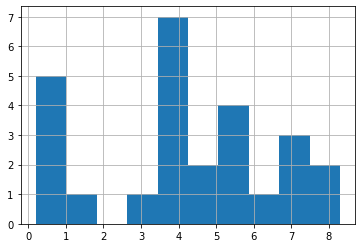

In [193]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

goal_df.value.hist()


In [194]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1,26.8,48,630,1731447,8.3,40,Goalkeeper,8.3
546,Fabianski,West Ham,1,2.2,50,720,80051,8.2,41,Goalkeeper,8.2
572,dos Santos Patrício,Wolves,1,7.5,55,720,284308,7.3,40,Goalkeeper,7.3
457,McCarthy,Southampton,1,19.9,45,720,570573,7.3,33,Goalkeeper,7.3
402,Darlow,Newcastle,1,1.8,50,720,151323,7.0,35,Goalkeeper,7.0
246,Schmeichel,Leicester,1,11.8,55,720,232803,6.2,34,Goalkeeper,6.2
525,Johnstone,West Brom,1,1.0,45,720,55961,5.8,26,Goalkeeper,5.8
294,Meslier,Leeds,1,4.1,45,720,293296,5.8,26,Goalkeeper,5.8
7,Leno,Arsenal,1,9.2,50,720,372932,5.6,28,Goalkeeper,5.6
112,Pope,Burnley,1,10.8,54,630,145660,5.4,29,Goalkeeper,5.4


<AxesSubplot:>

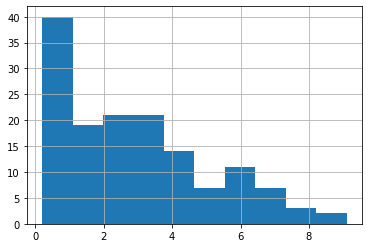

In [195]:
def_df.value.hist()

In [196]:
def_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
132,Zouma,Chelsea,2,15.9,53,630,1162800,9.1,48,Defender,9.1
463,Vestergaard,Southampton,2,7.9,47,585,552105,8.5,40,Defender,8.5
47,Mings,Aston Villa,2,11.3,52,630,815261,8.1,42,Defender,8.1
550,Cresswell,West Ham,2,8.1,51,720,614295,7.5,38,Defender,7.5
52,Konsa Ngoyo,Aston Villa,2,7.6,47,630,690567,7.4,35,Defender,7.4
577,Saïss,Wolves,2,18.6,52,517,1675150,7.3,38,Defender,7.3
267,Justin,Leicester,2,21.9,48,720,1267293,7.1,34,Defender,7.1
585,Kilman,Wolves,2,14.3,43,450,1007578,7.0,30,Defender,7.0
468,Walker-Peters,Southampton,2,11.4,45,720,467627,6.9,31,Defender,6.9
146,Chilwell,Chelsea,2,27.5,60,450,2040467,6.8,41,Defender,6.8


<AxesSubplot:>

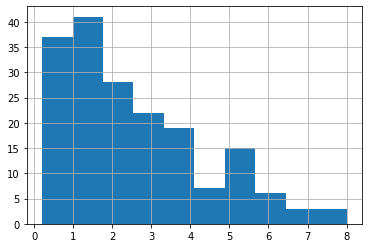

In [197]:
mid_df.value.hist()

In [198]:
mid_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
43,Grealish,Aston Villa,3,34.0,75,630,2239114,8.0,60,Midfielder,8.0
489,Son,Spurs,3,59.0,96,640,4423600,7.7,74,Midfielder,7.7
168,Zaha,Crystal Palace,3,29.2,74,720,2303467,7.3,54,Midfielder,7.3
464,Ward-Prowse,Southampton,3,7.8,60,720,496004,7.2,43,Midfielder,7.2
129,Frello Filho,Chelsea,3,11.4,52,455,1173131,7.1,37,Midfielder,7.1
564,Fornals,West Ham,3,1.8,64,660,144706,6.6,42,Midfielder,6.6
279,Klich,Leeds,3,6.2,56,696,713386,6.4,36,Midfielder,6.4
44,McGinn,Aston Villa,3,2.3,55,630,231698,6.2,34,Midfielder,6.2
286,Sousa de Azevedo e Costa,Leeds,3,8.2,56,622,1027184,5.9,33,Midfielder,5.9
589,Lomba Neto,Wolves,3,1.8,55,646,185398,5.8,32,Midfielder,5.8


<AxesSubplot:>

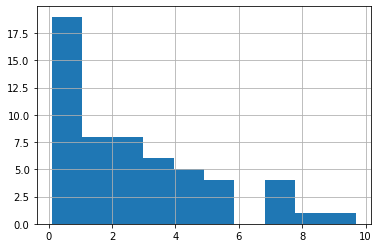

In [199]:
fwd_df.value.hist()

In [200]:
fwd_df.sort_values('value',ascending=False).head(20)



,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
283,Bamford,Leeds,4,34.5,60,670,2748183,9.7,58,Forward,9.7
425,Wilson,Newcastle,4,15.2,66,697,1338522,8.3,55,Forward,8.3
61,Watkins,Aston Villa,4,6.3,61,630,622590,7.7,47,Forward,7.7
197,Calvert-Lewin,Everton,4,57.0,78,698,3863423,7.3,57,Forward,7.3
487,Kane,Spurs,4,45.4,110,713,2610008,7.3,80,Forward,7.3
470,Adams,Southampton,4,4.2,59,675,290811,6.9,41,Forward,6.9
253,Vardy,Leicester,4,21.0,101,558,1392782,5.8,59,Forward,5.8
77,Maupay,Brighton,4,4.5,65,630,598350,5.8,38,Forward,5.8
460,Ings,Southampton,4,8.8,84,624,700479,5.6,47,Forward,5.6
225,Mitrović,Fulham,4,7.4,57,657,468837,4.9,28,Forward,4.9
